In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
#from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import LabelEncoder, StandardScaler
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.metrics import accuracy_score, make_scorer, f1_score
from collections import Counter
import scipy.stats as stats # for the breakpoints in SAX
from scipy.stats import norm
from Symbol import SYMBOLS
from distances import MINDIST
import warnings 
import ruptures as rpt
#from dtw import dtw
##from sklearn.model_selection import GridSearchCV
#from tslearn.neighbors import KNeighborsTimeSeriesClassifier
#from tslearn.utils import to_time_series_dataset
#from sklearn.metrics import confusion_matrix
#from sklearn.metrics import precision_recall_curve, average_precision_score
#from sklearn.metrics import roc_curve, auc

from SAX_transf import *
from utils import *
from ASTRIDE import *
from pyts.approximation import SymbolicFourierApproximation
from SFA import *

warnings.filterwarnings('ignore')
import os
import aeon
from aeon.datasets import load_classification

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



In [2]:
train_path = os.path.join(os.getcwd(), "datasets/classification/ECG200/ECG200_TRAIN.ts")
test_path = os.path.join(os.getcwd(), "datasets/classification/ECG200/ECG200_TEST.ts")

X_train = pd.read_csv(train_path, 
                      sep=",", 
                      header=None
                      )

X_train.columns = list(X_train.columns[:-1]) + ['label']
x_train, y_train = X_train.iloc[:, :-1], X_train["label"]

y_train = y_train.replace(-1, 0)

X_test = pd.read_csv(test_path, 
                      sep=",", 
                      header=None
                      )

X_test.columns = list(X_test.columns[:-1]) + ['label']
x_test, y_test = X_test.iloc[:, :-1], X_test["label"]

y_test = y_test.replace(-1, 0)

In [3]:
sfa = SFA(X_train, 4, 4)

sfa.symbolize_SFA()

X_SFA = sfa.symbolic_data


In [4]:
sfa.SFA_distance(X_SFA[0], X_SFA[1])

22.877558903835705

In [5]:
KNN = SYMBOLS(X_train, X_test, 'SFA', 1, 4, 4)
KNN.predict_SFA()

0.0
0.01
0.02
0.03
0.04
0.05
0.06
0.07
0.08
0.09
0.1
0.11
0.12
0.13
0.14
0.15
0.16
0.17
0.18
0.19
0.2
0.21
0.22
0.23
0.24
0.25
0.26
0.27
0.28
0.29
0.3
0.31
0.32
0.33
0.34
0.35
0.36
0.37
0.38
0.39
0.4
0.41
0.42
0.43
0.44
0.45
0.46
0.47
0.48
0.49
0.5
0.51
0.52
0.53
0.54
0.55
0.56
0.57
0.58
0.59
0.6
0.61
0.62
0.63
0.64
0.65
0.66
0.67
0.68
0.69
0.7
0.71
0.72
0.73
0.74
0.75
0.76
0.77
0.78
0.79
0.8
0.81
0.82
0.83
0.84
0.85
0.86
0.87
0.88
0.89
0.9
0.91
0.92
0.93
0.94
0.95
0.96
0.97
0.98
0.99
Accuracy:0.83


In [ ]:
scaled_x_test = std_scaler(x_test)
sax_trans = SAX_transform(scaled_x_test.iloc[0], 20, 5)
D_sax_rep = sax_trans.transf_1d_sax(8, 8)
D_sax_rep

esax_rep = sax_trans.calculate_esax()
esax_rep

'deeadeddeabcaaaaaaaaaaaaaaaabcddedeeddedddddddddcddccddddccd'

Voici la nouvelle représentation ESAX: eddbaaaaabdedddddcdc et sa taille20


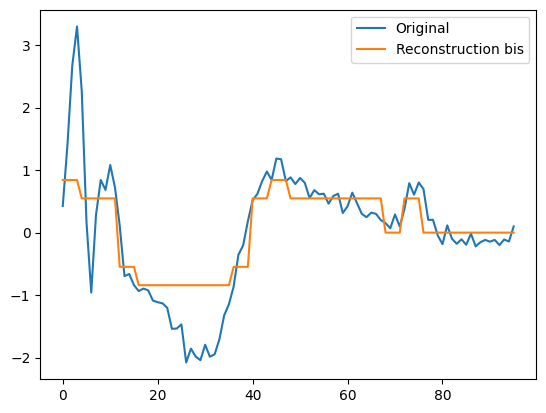

In [ ]:
reconstruction = sax_trans.reconstruction_from_sax(esax_rep)
reconstruction_bis = sax_trans.reconstruction_from_sax(esax_rep, option='esax')

plt.plot(scaled_x_test.iloc[0], label='Original')
#plt.plot(reconstruction, label='Reconstruction')
plt.plot(reconstruction_bis, label='Reconstruction bis')
plt.legend()
plt.show()

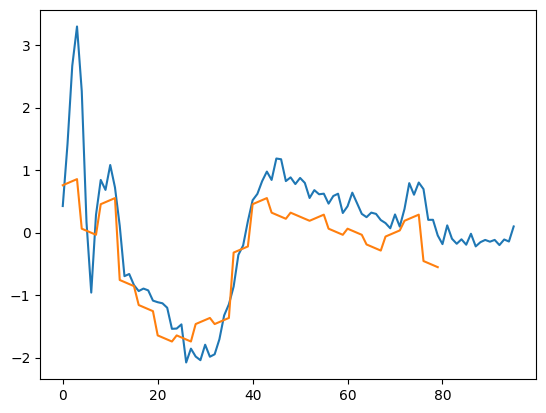

In [ ]:
reconstructed_serie = sax_trans.reconstruct_from_1d_sax(D_sax_rep, 20, 5)

plt.plot(scaled_x_test.iloc[0])
plt.plot(reconstructed_serie)
plt.show()

In [ ]:
one_knn = SYMBOLS(X_train=X_train,
                  X_test=X_test,
                  method="oneD_SAX",
                  Na= 4, 
                  Ns= 4,
                  )

In [ ]:
one_knn.predict_oneD()

Accuracy:0.64


ASTRIDE TESTSS

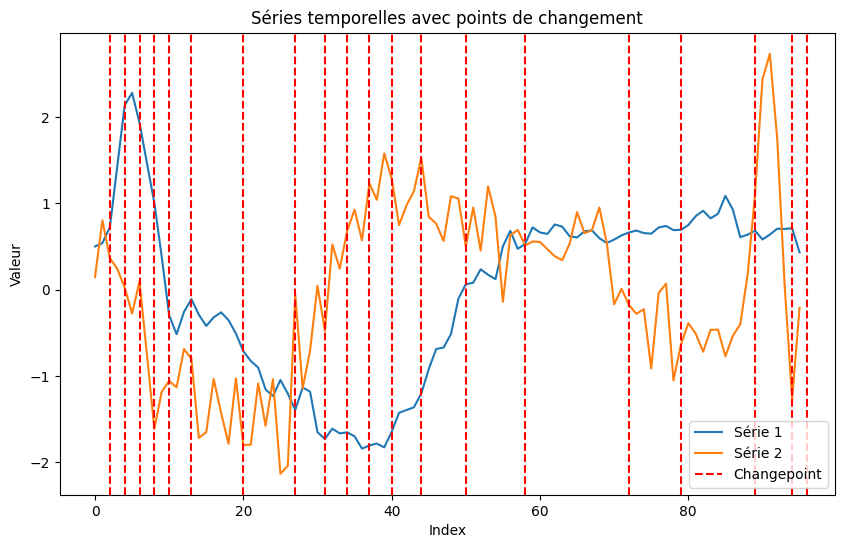

In [ ]:
dataset_np = std_scaler(x_train)
dataset_np = dataset_np.to_numpy()

astride = ASTRIDE_transf(dataset_np, 20, 5)
astride.segmentation_adaptive()
astride.mts_bkps_


ex_serie_1 = dataset_np[0]
ex_serie_2 = dataset_np[1]

plt.figure(figsize=(10, 6))
plt.plot(ex_serie_1, label='Série 1')
plt.plot(ex_serie_2, label='Série 2')

# Ajout des changepoints (mts_bkps_)
for cp in astride.mts_bkps_:
    plt.axvline(x=cp, color='red', linestyle='--', label='Changepoint' if 'Changepoint' not in plt.gca().get_legend_handles_labels()[1] else "")

# Ajouter légende et afficher
plt.legend()
plt.title("Séries temporelles avec points de changement")
plt.xlabel("Index")
plt.ylabel("Valeur")
plt.show()

In [ ]:
astride._ASTRIDE_symbolize()
s = astride.symbolic_data
s[10], len(s)

('EEDBCBBAAAABCEDECCC', 100)

In [ ]:
for i in range(len(s[2])):
    print(f"Changepoint {i} : {ord(s[2][i])}")


Changepoint 0 : 68
Changepoint 1 : 69
Changepoint 2 : 69
Changepoint 3 : 69
Changepoint 4 : 66
Changepoint 5 : 66
Changepoint 6 : 66
Changepoint 7 : 65
Changepoint 8 : 65
Changepoint 9 : 65
Changepoint 10 : 65
Changepoint 11 : 65
Changepoint 12 : 66
Changepoint 13 : 68
Changepoint 14 : 69
Changepoint 15 : 68
Changepoint 16 : 68
Changepoint 17 : 68
Changepoint 18 : 68


In [ ]:
s[2]

'DEEEBBBAAAAABDEDDDD'

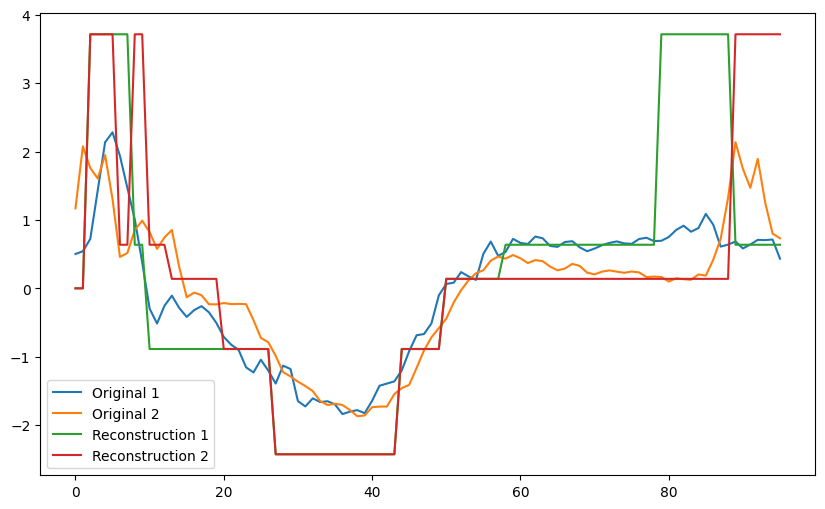

In [ ]:
a = astride.reconstruction_from_ASTRIDE(s[:4])
plt.figure(figsize=(10, 6))
plt.plot(dataset_np[0], label='Original 1')
plt.plot(dataset_np[3], label='Original 2')
plt.plot(a[0], label='Reconstruction 1')
plt.plot(a[3], label='Reconstruction 2')
plt.legend()
plt.show()

EEEDBBBAAAAABCDDEDD EEDEDCBAAAAABCCCCEE 42.85459957535649


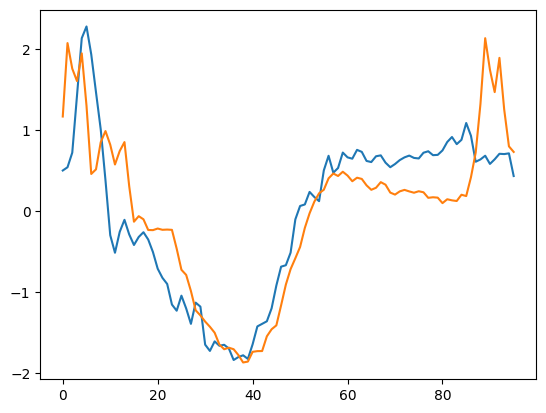

In [ ]:
distnace = astride.calculate_dged(s[0], s[3])
print(s[0], s[3], distnace)


plt.plot(dataset_np[0])
plt.plot(dataset_np[3])

On teste les KNNs ASTRIDE

In [ ]:
KNN_astride = SYMBOLS(X_train=X_train, 
                        X_test=X_test, 
                        method="ASTRIDE", 
)

KNN_astride.predict_ASTRIDE()
KNN_astride.predictions

0.0
0.01
0.02
0.03
0.04
0.05
0.06
0.07
0.08
0.09
0.1
0.11
0.12
0.13
0.14
0.15
0.16
0.17
0.18
0.19
0.2
0.21
0.22
0.23
0.24
0.25
0.26
0.27
0.28
0.29
0.3
0.31
0.32
0.33
0.34
0.35
0.36
0.37
0.38
0.39
0.4
0.41
0.42
0.43
0.44
0.45
0.46
0.47
0.48
0.49
0.5
0.51
0.52
0.53
0.54
0.55
0.56
0.57
0.58
0.59
0.6
0.61
0.62
0.63
0.64
0.65
0.66
0.67
0.68
0.69
0.7
0.71
0.72
0.73
0.74
0.75
0.76
0.77
0.78
0.79
0.8
0.81
0.82
0.83
0.84
0.85
0.86
0.87
0.88
0.89
0.9
0.91
0.92
0.93
0.94
0.95
0.96
0.97
0.98
0.99
Accuracy:0.91


[1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1]

Brouillon pour la traduction de ESAX, au final on prend que la moyenne

In [ ]:
if option == "esax":
            sax_representation = [sax_representation[i:i+3] for i in range(0, len(sax_representation), 3)]
            for symbols in sax_representation:
                averaga_symbol = 
                
                
                
                if ord(symbols[1]) == 122:
                    paa_values.append(breakpoints[-1])
                elif ord(symbols[1]) == 97:
                    paa_values.append(breakpoints[0])
                else: 
                    paa_val_0 = np.mean([breakpoints[ord(symbols[0]) - 97], breakpoints[ord(symbols[0]) - 96]])
                    paa_val_1 = np.mean([breakpoints[ord(symbols[1]) - 97], breakpoints[ord(symbols[1]) - 96]])
                    paa_val_2 = np.mean([breakpoints[ord(symbols[2]) - 97], breakpoints[ord(symbols[2]) - 96]])
                    paa_values.append(np.mean([paa_val_0, paa_val_1, paa_val_2]))
        

SyntaxError: invalid syntax (601171658.py, line 4)